In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from scipy import stats

warnings.simplefilter(action='ignore', category=FutureWarning)

# 1 Introducció / Presentació del dataset
Comentari origen del dataset i objectiu del mateix. Quina pregunta intenta respondre.

In [2]:
# Read csv file
raw_df = pd.read_csv('neveras.csv', decimal=",")

In [3]:
#Rows and columns info
print(f'El data frame conté {len(raw_df.index)} mostres.')
print(f'Cada mostra disposa de {len(raw_df.columns)} atributs')

El data frame conté 488 mostres.
Cada mostra disposa de 136 atributs


Disposem de 136 variables, aquest és un nombre considerable de variables i per tant sera inevitable prescindir de moltes d'elles. En el que segeix de treball seleccionarem les variables que aporten més informació i les que puguin ser d'utilitat per tal de transformar el dataset cru del que partim en un dataset net llest per a la creacció de models. 

In [4]:
# Var list and missig values
missing_values = raw_df.isna().sum()
missing_values[missing_values < 50].sort_values()

product-name               0
product-sending-value      0
val-quantity               0
val-points                 0
date                       0
ref                        0
price                      0
product-type               0
marca                      0
Garantía                   5
Anchuraexacta              5
Alturaexacta               5
Númerodepuertas            8
Tipodeinstalación          9
Alimentación              10
ConsumoAnualdeEnergía     12
Altura                    12
Capacidadfrigorífico      12
Anchura                   13
BaldasenRefrigerador      16
EficienciaNueva           22
Profundidad               23
Ruido                     24
Color/material            25
Refrigeración             25
ReguladordeTemperatura    35
Tirador                   39
Cajones/Cestas            43
Peso                      45
Iluminación               47
PosicióndelosControles    49
dtype: int64

Moltes variables contenen força valors nuls. Donat l'alt nombre de variables utilitzarem el nombre de valors nuls com a criteri per realitzar una subselecció de variables. En el que seguiex d'informe treballarem sobre les variables que contenen 25 o menys valor nuls. Aquest valor representa aproximadament un 5% de les mostres(488).

# 2 Selecció de variables i adecució de format

En aquesta secció hem analitzat les 26 variables que passen el tall del nombre de valors nuls proposat. Primer de tot, s'exposen quines variables, que pasen el tall, també han estat descartades i els motius pels quals ens hem decantat per aquesta decisió en cada una d'elles. La resta de variables han estat considerades interesants per a seguir estudiant-les amb més profunditat, és per aixó que al final de la secció, hem adequat el format de cada una d'elles i les hem inclos en un nou dataframe anomenta selected_df.

## 2.1 Variables descartades

Primer de tot mostrem els primer valors de les variables descartades per tal de fer-nos una idea de que conté cada una d'elles.

In [5]:
# Mostrem els primer valors de les variables descartades
raw_df[['product-name','ref','product-type','date','Alimentación',
        'val-quantity','val-points','Altura','Anchura']].head().transpose()

,0,1,2,3,4
product-name,TEKA NFL 320 C INOX - Frigorífico Combi No Frost,INDESIT TAA 5 1 BLANCO - Frigorífico Dos Puert...,INDESIT LI8 SN2E X Inox - Frigorífico Combi No...,TEKA NFL-320 Blanco - Frigorífico Combi No Frost,KROMSLINE KC-185-DW BLANCO - Frigorífico Combi...
ref,115216026,14760137,14762233,115214386,702139949
product-type,frigorificos,frigorificos,frigorificos,frigorificos,frigorificos
date,2023-04-24,2023-04-24,2023-04-24,2023-04-24,2023-04-24
Alimentación,230V,230V,230V,230V,230V
val-quantity,(20),(6),(2),(12),(0)
val-points,4.7,4.83,5.0,4.73,0.0
Altura,181 a 190,176 a 180 cm,181 a 190,181 a 190,181 a 190
Anchura,55 a 60 cm,66 a 70 cm,55 a 60 cm,55 a 60 cm,55 a 60 cm


La variable product-name conte el nom del producte i la variable ref conté un valor numeric referencia al producte. Aquestes dues variables són una etiqueta identificativa i no constitueixen una caracteristica descriptiva de producte. Volem seleccionar les variables que descriuen el productes i per tant les descartem.

In [6]:
# Mostrem els valors únics
print(raw_df['product-type'].unique())
print(raw_df['date'].unique())
print(raw_df['Alimentación'].unique())

['frigorificos']
['2023-04-24']
['230V' nan ' 230V' '230V ']


Les variables product-type i date contenen un mateix valor per a totes mostres, degut a la manca de variancia no aporten informacó en la creació d'un futur model. Succeeix el mateix en el cas de la variable alimentació, totes els electrodomestics extrets d'aquesta font son per al mercat europeu i funcionen a una font d'alimentació de 230V.

Les variables val-quantity i val-points estan estricatament relacionades, la variables val-quantity indica el nombre de valoracions total de cada producte, metre que val-points és la mitjana de les valoracions. Si un producte no te cap valoració se li assigna per defecte una nota mitja de 0.

In [7]:
# Netejem i guardem la variable val-quantity en una variable separada
val_quantity = raw_df['val-quantity'].str.replace('(', '').str.replace(')', '').astype('Int64')

In [8]:
# Taula de freqüències
val_quantity.value_counts()

0     428
1      23
2       9
6       5
3       5
4       5
10      3
8       2
5       2
7       2
20      1
12      1
13      1
14      1
Name: val-quantity, dtype: Int64

Hi ha 428 items que no tenen cap valoració. La variable val-point ha passat el tall dels nuls degut a que en aquesta variable els valors nuls ha estat codificats amb el valor 0.

Aquestes tipus de variables poden ser molts útils per a la creació d'un model ja que aporten l'opinió del clients sobre els productes. En aquest cas, degut a la manca generalitzada de valoracions considerem que els valors no resulten prou fiables per tenir-los en compte.


Observem a continuació els primer valors de les variables Alturaexacta i Altura.

In [9]:
raw_df[['Alturaexacta','Altura']].head()

,Alturaexacta,Altura
0,188 Centímetros,181 a 190
1,180 Centímetros,176 a 180 cm
2,189 Centímetros,181 a 190
3,188 Centímetros,181 a 190
4,185 Centímetros,181 a 190


A priori, les variables Alturaexacta i Altura representen la meteixa informació, amb la diferencia que una és una variable númerica i l'altre categorica. Calculem a continuació la correlació entre ambdues:

In [10]:
aux_df = pd.DataFrame()
aux_df["Altura"] = pd.Categorical(raw_df["Altura"])
aux_df["Alturaexacta"] = pd.Categorical(raw_df["Alturaexacta"])

corr = aux_df["Altura"].cat.codes.corr(aux_df["Alturaexacta"].cat.codes)

corr

0.886325742819265

Com era d'esperar aquests dues variables tenen una correlació molt elevada Decidim descartar la variable altura ja que aporta una informació menys precisa, en forma de rang i conte més valors nuls.

Es dona el mateix cas entre les variables Anchura i Anchuraexacta. Pel mateix motiu, decidim descartar la variable Anchura.

## 2.2 Variables seleccionades i adeqüació del format

Creem un nou dataframe per guardar les variables que han estat seleccionades.

In [11]:
# df per guardar les variables seleccionades
selected_df = pd.DataFrame()

Observem els primer valors de les variables selecionades per tal de fer-nos una idea de que conté cada una d'elles

In [12]:
# Mostrem els primer valors de les variables seleccionades
raw_df[['price','marca','product-sending-value','Garantía','Alturaexacta','Anchuraexacta',
        'Númerodepuertas','Tipodeinstalación','ConsumoAnualdeEnergía',
        'Capacidadfrigorífico','BaldasenRefrigerador','EficienciaNueva',
        'Profundidad','Ruido','Refrigeración','Color/material']].head().transpose()

,0,1,2,3,4
price,"418,49 €","393,49 €","437,49 €","406,49 €","455,20 €"
marca,TEKA,INDESIT,INDESIT,TEKA,KROMSLINE
product-sending-value,"37,00 €","37,00 €","37,00 €","37,00 €","37,00 €"
Garantía,3 Años,3 Años,3 Años,3 Años,5 Años
Alturaexacta,188 Centímetros,180 Centímetros,189 Centímetros,188 Centímetros,185 Centímetros
Anchuraexacta,60 Centímetros,70 Centímetros,60 Centímetros,60 Centímetros,60 Centímetros
Númerodepuertas,2 Puertas,2 Puertas,2 Puertas,2 Puertas,2 Puertas
Tipodeinstalación,Libre,Libre,Libre,Libre,Libre
ConsumoAnualdeEnergía,293 Kwh/Año,282 Kwh/Año,247 Kwh/Año,293 Kwh/Año,256 Kwh/Año
Capacidadfrigorífico,224 Litros,333 Litros,230 Litros,224 Litros,211 Litros


La majoria d'aquestes variables contenen les unitats i estan en format string quan es tracta d'una variable númerica. Procedim a adequar el farmat de cada una d'elles i les afegim al nou dataframe 

In [13]:
# Seleccionem i addecuem el format
selected_df['precio'] = raw_df['price'].str.replace('.', '').str.replace(',', '.').str.replace(' €', '').astype(float)
selected_df['marca'] = raw_df['marca']
selected_df['gastos_envio'] = raw_df['product-sending-value'].str.replace('.', '').str.replace(',', '.').str.replace(' €', '').astype(float)
selected_df['garantía'] = raw_df['Garantía'].str.replace(' Años', '').astype('Int64')
selected_df['altura'] = raw_df['Alturaexacta'].str.replace('.', '').str.replace(' Centímetros', '').astype('Int64')
selected_df['anchura'] = raw_df['Anchuraexacta'].str.replace('.', '').str.replace(' Centímetros', '').astype('Int64')
selected_df['profundidad'] = raw_df['Profundidad'].str.replace(' Centímetros', '').astype('Int64')
selected_df['capacidad'] = raw_df['Capacidadfrigorífico'].str.replace(' Litros', '').str.replace('\\r', '').astype('Int64')
selected_df['puertas'] = raw_df['Númerodepuertas'].str.replace(" Puertas", "").astype('Int64')
selected_df['baldas'] = raw_df['BaldasenRefrigerador'].str.replace(' Baldas', '').str.replace(' ', '').astype('Int64')
selected_df['instalación'] = raw_df['Tipodeinstalación'].str.replace(' ', '')
selected_df['consumo_anual'] = raw_df['ConsumoAnualdeEnergía'].str.replace(' Kwh/Año', '').astype('Int64')
selected_df['eficiencia'] = raw_df['EficienciaNueva'].str.replace(' ', '')
selected_df['ruido'] = raw_df['Ruido'].str.replace(' Decibelios', '').astype('Int64')
selected_df['refrigeración'] = raw_df['Refrigeración'].str.replace(" ", "")
selected_df['color'] = raw_df['Color/material'].str.replace(" ", "")

In [14]:
# Mostrem els primer valors de les variables ade
selected_df.head().transpose()

,0,1,2,3,4
precio,418.49,393.49,437.49,406.49,455.2
marca,TEKA,INDESIT,INDESIT,TEKA,KROMSLINE
gastos_envio,37.0,37.0,37.0,37.0,37.0
garantía,3,3,3,3,5
altura,188,180,189,188,185
anchura,60,70,60,60,60
profundidad,64,69,66,64,66
capacidad,224,333,230,224,211
puertas,2,2,2,2,2
baldas,4,5,4,<NA>,4


El dataframe selected_df conte 16 variables, ja no conte cap unitat i està preparat per a poder gestionar els valors extrems i valors nuls.

# Gesió dels valors extrems i perduts

Com ja em vist abans algunes de les variables contenen un nombre reduit de valors nuls. En aquest apartat gestionarem aquest valors nuls i analitzarem si existeixen valors extrems que són errors de les dades, en cas que existexin els gestionarem de la forma adecuada.

Separem el dataframe en dos, ja que gestionarem de forma diferent les varables categoriques i les numeriques

In [15]:
# Separem en dos df
cat_df = selected_df[['marca','instalación', 'eficiencia', 'refrigeración', 'color']]
num_df = selected_df[['precio', 'gastos_envio', 'garantía', 'altura', 'anchura',
                      'profundidad', 'capacidad', 'puertas', 'baldas', 'consumo_anual', 'ruido']]

## Cerca i gestió de valors extrems

Començarem amb els valors extrems perquè alguns d'ells no existeix una millor manera de gestionar-los que computar-los com a valors perduts i gestionar-los posteriorment com a tals.

Imprimim els valors únics de les variables catecoriques per veure si hi ha algun valor incorrecte o que no pertanyi als subconjunts de valors possibles de la categoria.

In [16]:
for var_name in cat_df.columns:
    print(f'Valors únics variable {var_name}:')
    print(f'{cat_df[var_name].dropna().unique()} \n')

Valors únics variable marca:
['TEKA' 'INDESIT' 'KROMSLINE' 'BOSCH' 'BALAY' 'SMEG' 'WINIA' 'LG'
 'SIEMENS' 'FAGOR' 'BEKO' 'ARISTON HOTPOINT' 'EDESA' 'ROMMER' 'CATA'
 'NIBELS' 'BUTSIR'] 

Valors únics variable instalación:
['Libre' 'Integrable'] 

Valors únics variable eficiencia:
['F' 'E' 'D' 'C' 'B' 'A'] 

Valors únics variable refrigeración:
['NoFrost' 'Cíclico' 'LowFrost' 'Estático' 'Defrost'] 

Valors únics variable color:
['Inox' 'Blanco' 'Azul' 'Negro' 'Gris' 'AceroMate' 'Verde' 'Rojo'
 'Amarillo' 'Lima' 'Plata' 'Naranja' 'Crema' 'Antracita' 'Rosa' 'Marrón'] 



No observem cap valor extrem en les variables categoriques. 

Pasem a analitzar si existeixen outliers dins les variables númeriques. Per fer-ho definirem una funció que cerca els valors a més de 2 desviacions estàndard de la mitjana.

In [17]:
def search_outliers(values, std_times = 2):
    z_scores = (values - np.mean(values)) / np.std(values)
    outliers = values[np.abs(z_scores) > std_times]
    return np.sort(outliers.unique())

In [18]:
for var_name in num_df.columns:
    print(var_name, search_outliers(num_df[var_name]))

precio [3943.18 4493.78 4936.49 9317.08]
gastos_envio [78.]
garantía [5 10]
altura [970 2030]
anchura [128 179 540]
profundidad [815]
capacidad [26 34 85 88 90 101 103 105 106 107 109 416 418 455 479]
puertas [0 4]
baldas [0 2 7]
consumo_anual [0 404 406 413 415 419 420 430 450 454 936]
ruido [74 254]


In [19]:
selected_df[selected_df['precio'] > 3900]

,precio,marca,gastos_envio,garantía,altura,anchura,profundidad,capacidad,puertas,baldas,instalación,consumo_anual,eficiencia,ruido,refrigeración,color
159,9317.08,SMEG,37.0,3,87,128,82,109,1,<NA>,Libre,103,F,37,Cíclico,Blanco
179,4493.78,SMEG,37.0,3,187,92,73,385,4,3,Libre,415,F,39,NoFrost,Crema
180,9317.08,SMEG,37.0,3,87,128,82,109,1,<NA>,Libre,103,F,37,Cíclico,Azul
203,9317.08,SMEG,37.0,3,87,128,82,109,1,<NA>,Libre,103,F,37,Cíclico,Amarillo
231,3943.18,SMEG,37.0,3,187,92,76,385,4,4,Libre,415,F,39,NoFrost,Antracita
292,3943.18,SMEG,37.0,3,187,92,76,385,4,4,Libre,415,F,39,NoFrost,Crema
360,9317.08,SMEG,37.0,3,87,128,815,109,1,<NA>,Libre,103,F,37,Estático,Rojo
377,4493.78,SMEG,37.0,3,187,92,76,385,4,3,Libre,415,F,39,NoFrost,Negro
382,9317.08,SMEG,37.0,3,87,128,82,109,1,<NA>,Libre,103,F,37,Estático,Verde
397,4936.49,LG,37.0,3,178,91,75,387,4,3,Libre,454,F,41,NoFrost,Inox


In [20]:
np.array([2,3,None])

array([2, 3, None], dtype=object)

Visualitzar primer les diferents variables que hem seleccionat, quants valors nuls tenen i els seus valors únics per poder decidir com treballar-los individualment.

In [21]:
i = 0
for line in selected_df.isnull().sum():
    colname = selected_df.columns[i]
    print("\n", colname, "té", line, "NULLS")
    if len(selected_df[colname].unique()) <=25:
        print(selected_df[colname].value_counts())
    i += 1


 precio té 0 NULLS

 marca té 0 NULLS
SMEG                112
BOSCH                83
BALAY                66
LG                   52
TEKA                 35
ROMMER               33
INDESIT              24
KROMSLINE            20
WINIA                16
BEKO                 15
ARISTON HOTPOINT     13
SIEMENS              10
FAGOR                 4
CATA                  2
EDESA                 1
NIBELS                1
BUTSIR                1
Name: marca, dtype: int64

 gastos_envio té 0 NULLS
37.0    443
78.0     45
Name: gastos_envio, dtype: int64

 garantía té 5 NULLS
3     464
5      17
10      2
Name: garantía, dtype: Int64

 altura té 5 NULLS

 anchura té 5 NULLS

 profundidad té 23 NULLS

 capacidad té 12 NULLS

 puertas té 8 NULLS
2    355
1     96
4     24
0      3
3      2
Name: puertas, dtype: Int64

 baldas té 16 NULLS
4    177
3    132
5    126
7     16
2     11
6      9
0      1
Name: baldas, dtype: Int64

 instalación té 9 NULLS
Libre         455
Integrable     24
Name: 

Tenim 4 casos diferents:
- La variable no té valors nuls.
- La variable té un valor predominant que podem assignar per defecte. Per exemple els costos d'enviament solen ser en la majoria dels casos de 37€.
- La variable té una distribució més equilibrada entre les categories i no hi podem assignar cap valor. Un exemple seria la distribució de colors de les neveres.
- La variable és numèrica i podem fer servir estadística per trobar el seu valor. Com ara en el cas de l'alçada o amplada.

En el cas dels outliers visualitzarem els valors únics de les variables numèriques per veure els casos concrets.

In [22]:
def search_outliers(column):
    selected_df_column = selected_df[column].dropna().unique()
    z_scores = (selected_df_column - np.mean(selected_df_column)) / np.std(selected_df_column)
    outlier_threshold = 2
    outliers = selected_df_column[np.abs(z_scores) > outlier_threshold]
    return outliers.tolist()


In [23]:
for column in ["precio", "altura", "anchura", "profundidad", "capacidad", "ruido"]:
    print(column, search_outliers(column))

precio [2860.49, 9317.08, 4493.78, 2972.35, 3943.18, 2685.26, 2771.49, 2520.49, 2610.99, 4936.49, 2566.67]
altura [2030, 970]
anchura [540]
profundidad [815]
capacidad [479, 34, 26, 455]
ruido [254]


En el cas del preu, no obtenim valors gaire descabellats però anem a analitzar els altres casos individualment.

En el cas de les dimensions de les neveres veiem que en aquests casos concrets hi ha hagut un error en les unitats afegint un 0 de més. Veiem que en aquest cas en les dades originals el rang de les dimensions és correcte mentre que les mesures exactes no.

In [24]:
raw_df[["Altura", "Alturaexacta"]].loc[selected_df['altura'] >= 970]

,Altura,Alturaexacta
199,Mayor de 200 cm,2.030 Centímetros
413,50 a 100 cm,970 Centímetros


In [25]:
raw_df[["Anchura", "Anchuraexacta"]].loc[selected_df['anchura'] >= 540]

,Anchura,Anchuraexacta
447,51 a 54 cm,540 Centímetros


En el cas de la profunditat veiem que tot i que no tenim una variable categòrica per comparar, veient la resta de dimensions de la nevera podem asumir que succeeix el mateix.

In [26]:
raw_df[["Alturaexacta", "Anchuraexacta", "Profundidad"]].loc[selected_df['profundidad'] >= 815]

,Alturaexacta,Anchuraexacta,Profundidad
360,87 Centímetros,128 Centímetros,815 Centímetros


In [27]:
selected_df.loc[selected_df['precio'] >= 2500, 'precio'] = np.nan
selected_df.loc[selected_df['altura'] >= 970, 'altura'] /= 10
selected_df.loc[selected_df['anchura'] >= 540, 'anchura'] /= 10
selected_df.loc[selected_df['profundidad'] >= 815, 'profundidad'] = np.ceil(selected_df.loc[selected_df['profundidad'] >= 815, 'profundidad'] / 10)

En el cas del soroll veiem que tenim un outlier de 254 dB. El que està molt per sobre dels límits humans i ens fa pensar que es tracta d'un error. En aquest cas podem triar o calcular la mitjana o assumir que realment si que és una nevera sorollosa però triar un threshold més raonable.

In [28]:
selected_df.loc[selected_df['ruido'] >= 100, 'ruido'] = 100

Per gestionar els nuls en el cas de les variables numèriques podem calcular la mitjana i omplir els valors nuls amb aquesta.

In [29]:
def fill_na_mean(data, column):
    average = round(data[column].dropna().mean())
    data[column] = data[column].fillna(average)
    return

In [30]:
for column in ['precio', 'altura', 'anchura', 'profundidad', 'capacidad', 'baldas', 'consumo_anual']:
    fill_na_mean(selected_df, column)
# en el cas del soroll hem de tenir en compte que tenim una escala logarítmica

ruidocol = selected_df['ruido'].dropna()
linear_values = 10 ** (ruidocol / 10)
average_decibel = round(10 * np.log10(np.mean(linear_values)))
selected_df['ruido'] = selected_df['ruido'].fillna(average_decibel)

print(selected_df[['altura', 'anchura', 'profundidad', 'capacidad', 'ruido', 'baldas', 'consumo_anual']].isnull().sum())

altura           0
anchura          0
profundidad      0
capacidad        0
ruido            0
baldas           0
consumo_anual    0
dtype: int64


En el cas de la eficiència com si que hi ha una relació entre les diferents lletres (A millor i F pitjor), podem convertir-ho en una variable numèrica per calcular la 'lletra mitjana' i després reconvertir-ho en la variable categòrica que és.

In [31]:
mapping_dict = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6}

selected_df['eficiencia'] = selected_df['eficiencia'].map(mapping_dict)

mean_value = round(selected_df['eficiencia'].mean())

selected_df['eficiencia'].fillna(mean_value, inplace=True)
selected_df['eficiencia'] = selected_df['eficiencia'].map({v: k for k, v in mapping_dict.items()})

En el cas de variables com garantia, puertas o refrigeración, tenim un grup predominant on podem enviar els valors nuls, la majoria de neveres tenen 2 portes, o refrigeració NoFrost. En el cas de la garantía fins i tot podem raonar que per llei tots els electrodomèstics estan obligats a 3 anys mínim. Per tant podem declarar que sempre tindran 3 anys de garantia.

In [32]:
selected_df['garantía'] = selected_df['garantía'].fillna(3)
selected_df['puertas'] = selected_df['puertas'].fillna(2)
selected_df['refrigeración'] = selected_df['refrigeración'].fillna('NoFrost')
selected_df['instalación'] = selected_df['refrigeración'].fillna('Libre')
# En el cas del color com tenim tantes categories diverses de color podem mantenir
# els nuls com una categoria apart 'desconocido'
selected_df['color'] = selected_df['color'].fillna('Desconocido')

In [33]:
i = 0
for line in selected_df.isnull().sum():
    colname = selected_df.columns[i]
    print("\n", colname, "té", line, "NULLS")
    i += 1


 precio té 0 NULLS

 marca té 0 NULLS

 gastos_envio té 0 NULLS

 garantía té 0 NULLS

 altura té 0 NULLS

 anchura té 0 NULLS

 profundidad té 0 NULLS

 capacidad té 0 NULLS

 puertas té 0 NULLS

 baldas té 0 NULLS

 instalación té 0 NULLS

 consumo_anual té 0 NULLS

 eficiencia té 0 NULLS

 ruido té 0 NULLS

 refrigeración té 0 NULLS

 color té 0 NULLS


## Analisi de les dades

Per realitzar l'anàlisi de les dades anem a definir un nou dataframe sobre el que treballarem, en aquest aprofitarem per convertir les variables categòriques en factors numèrics per poder realitzar proves estadístiques.

In [34]:
analysis_df = selected_df.copy()

df_object_columns = analysis_df.select_dtypes(include=['object'])
analysis_df[df_object_columns.columns] = df_object_columns.astype('category')

Anem a comprovar si es compleix que tenim una distribució normal de les dades realitzant el test de Wilk-Shapiro. D'aquesta manera ho veurem més clarament que en una representació gràfica i si obtenim p-values més grans que alfa veurem clarament que és el cas.

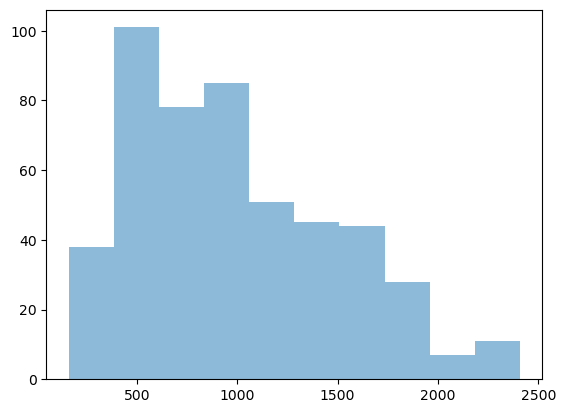

In [35]:
plt.hist(analysis_df['precio'], bins=10, alpha=0.5, label='precio')
plt.show()

In [36]:
def get_pvalue(data):
    _, p_value = stats.shapiro(data)
    return p_value
print('Shapiro-Wilk Test - p-value')
for column in analysis_df.columns:
    if analysis_df[column].dtype.name == 'category':
        original_values = analysis_df[column].cat.codes.astype('float')
        p_value = format(get_pvalue(original_values), ".2e")
    else:
        p_value = format(get_pvalue(analysis_df[column]), ".2e")
    print(f'\t {column} = {p_value}')

Shapiro-Wilk Test - p-value
	 precio = 1.61e-12
	 marca = 1.75e-20
	 gastos_envio = 9.10e-39
	 garantía = 7.85e-42
	 altura = 6.63e-28
	 anchura = 1.61e-31
	 profundidad = 1.37e-22
	 capacidad = 9.34e-09
	 puertas = 5.91e-31
	 baldas = 8.66e-19
	 instalación = 8.73e-32
	 consumo_anual = 2.16e-16
	 eficiencia = 5.74e-20
	 ruido = 1.50e-34
	 refrigeración = 8.73e-32
	 color = 5.53e-19


Veiem que tenim p-values molt petits, tenint en compte que alfa ronda entre 0.05 i 0.1. Això vol dir que no tenim distribució normal de les dades. Amb algunes variables es pot veure molt clarament de forma gràfica.

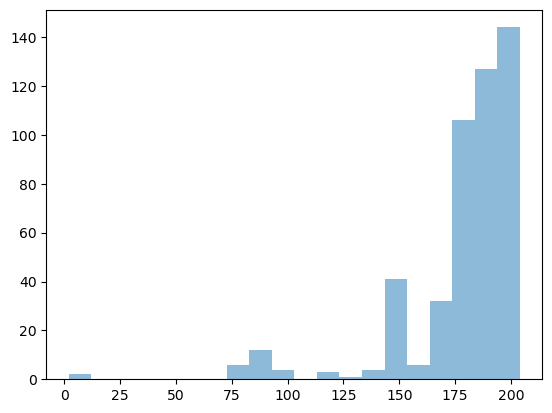

In [41]:
plt.hist(analysis_df['altura'], bins=20, alpha=0.5, label='precio')
plt.show()

In [38]:
raw_df['Refrigeración'] = raw_df['Refrigeración'].str.replace(" ", "").fillna("NoFrost")
raw_df['Númerodepuertas'] = raw_df['Númerodepuertas'].str.replace(" Puertas", "").fillna("2").astype(int)
raw_df['Tipodeinstalación'] = raw_df['Tipodeinstalación'].str.replace(' ', '')
raw_df['Cajones/Cestas'] = raw_df['Cajones/Cestas'].str.replace(" Cajoneras", "").fillna("2").astype(int)
raw_df['Iluminación'] = raw_df['Iluminación'].fillna("Unknown")
raw_df['Color/material'] = raw_df['Color/material'].str.replace(" ", "").fillna("Unknown")
raw_df['Tirador'] = raw_df['Tirador'].str.replace(" ", "").fillna("Unknown")
raw_df['Alimentación'] = raw_df['Alimentación'].str.replace('V', '').str.replace(' ', '').fillna("230").astype(int)
raw_df['EficienciaNueva'] = raw_df['EficienciaNueva'].str.replace(' ', '').fillna("E")
raw_df['ConsumoAnualdeEnergía'] = raw_df['ConsumoAnualdeEnergía'].str.replace(' Kwh/Año', '')
average = raw_df['ConsumoAnualdeEnergía'].dropna().astype(float).mean()
raw_df['ConsumoAnualdeEnergía'] = raw_df['ConsumoAnualdeEnergía'].fillna(average).astype(int)

raw_df['Ruido'] = raw_df['Ruido'].str.replace(' Decibelios', '')
ruidocol = raw_df['Ruido'].replace("254", np.nan).dropna().astype(float)
linear_values = 10 ** (ruidocol / 10)
average_decibel = 10 * np.log10(np.mean(linear_values))
raw_df['Ruido'] = raw_df['Ruido'].fillna(average_decibel).astype(int)


raw_df['Alturaexacta'] = raw_df['Alturaexacta'].str.replace(' Centímetros', '') #falta gestionar NULLS i convertir a INT
raw_df['Anchuraexacta'] = raw_df['Anchuraexacta'].str.replace(' Centímetros', '') #falta gestionar NULLS i convertir a INT
raw_df['Profundidad'] = raw_df['Profundidad'].str.replace(' Centímetros', '') #falta gestionar NULLS i convertir a INT
raw_df['Garantía'] = raw_df['Garantía'].str.replace(' Años', '').fillna('3').astype(int)
raw_df['BaldasenRefrigerador'] = raw_df['BaldasenRefrigerador'].str.replace(' Baldas', '').str.replace(' ', '') #falta gestionar NULLS i convertir a INT
raw_df['Capacidadfrigorífico'] = raw_df['Capacidadfrigorífico'].str.replace(' Litros', '').str.replace('\\r', '') #falta gestionar NULLS i convertir a INT

i = 0
for line in raw_df.isnull().sum():
    if line < 50:
        colname = raw_df.columns[i]
        print(colname, "has", line, "NULLS")
        print(raw_df[colname].unique(), "\n")
    i += 1

product-name has 0 NULLS
['TEKA NFL 320 C INOX - Frigorífico Combi No Frost'
 'INDESIT TAA 5 1 BLANCO - Frigorífico Dos Puertas Cíclico'
 'INDESIT LI8 SN2E X Inox - Frigorífico Combi No Frost parcial '
 'TEKA NFL-320 Blanco - Frigorífico Combi No Frost'
 'KROMSLINE KC-185-DW BLANCO - Frigorífico Combi No Frost '
 'BOSCH KGN36VIEA INOX - Frigorífico Combi NoFrost '
 'KROMSLINE KF-4P-80-DDIX INOX - Frigorífico Americano No Frost '
 'BALAY 3KUF233S Integrable - Nevera Una Puerta Cíclico'
 'SMEG FAB30RBE5 AZUL - Frigorífico Dos Puertas Cíclico'
 'BOSCH KGN36VIDA INOX - Frigorífico Combi No Frost'
 'TEKA NFL-345 Blanco - Frigorífico Combi No Frost'
 'BALAY 3KFE768WI Cristal Blanco - Frigorífico Combi NoFrost'
 'BALAY 3KFE560WI Blanco - Frigorífico Combi NoFrost'
 'WINIA WRN-BV300NPT INOX - Frigorífico Combi NoFrost'
 'BALAY 3KFE778WI Cristal Blanco - Frigorífico Combi NoFrost'
 'LG GBP61SWPGN Blanco - Frigorífico Combi No Frost'
 'SIEMENS KG36NXIDA INOX - Frigorífico Combi NoFrost'
 'WINIA 